# <center>NYC Hospitals Patient Satisfaction Scores – 2009 </center>

## Objective: 

Survey is conducted by the federal Centers for Medicare and Medicaid Services (CMS) as a standard assessment tool for all hospitals throughout USA. As part of this survey, patient satisfaction scores in New York City’s 11 public hospitals were collected in the year 2009. These are patient satisfaction scores measured by a standardized survey known as the Hospital Consumer Assessment of Healthcare Providers & Systems (HCAHPS).

The objective of the study is to find out the satisfaction level of a patient with the services or ambience provided by the hospital in New York. To accomplish the objective the dataset provided by the City of New York is used. The dataset consists of feedback from the patients by answering a simple survey of 10 questions. "How often were the patients rooms and bathrooms kept clean?","How often did doctors communicate well with patients?","How do patients rate the hospital overall?","Would patients recommend the hospital to friends and family?" are a few of the questions in the survey. The dataset also consists of the percentage of patients who has taken the survey and given positive feedback on a hospital.

The goal is to perform exploratory data analysis by organizing data, draw insights and make recommendations to the hospital or patients based on the findings. To achieve this we will be plotting data for each hospital by using the columns from the dataset. Recommendations to the patients would include: to opt for appropriate hospital according to their priority of service, to the hospitals would include: to improve on the areas that they are lagging in.

## Data Mining:


The dataset has 110 rows; 10 rows for each hospital with one feedback question along with answer and percentage of patients who selected the positive response in each row of data. Along with these details there are many other columns like ID numbers, null values etc in each row. Relevant data for analysis is filtered by: 

1. Converting the json to an organized dictionary, variable name: dictOfWords, with 110 rows; each hospital with 10 rows or 10 questions. Dictionary has rownumber as key and a list of details about the feedback question as values.  
2. Storing the dictionary values to a list, variable name: dict_to_list, and sort the list based on the hospital name and then by feedback question.  
3. Create a dictionary, variable name: grouped_dict, with dictionary key as hospital name and dictionary values as questions and responses to the feedback questions for that hospital. Dictionary values is a nested list with [feedback question, positive response to the feedback question and percentage of people who gave the positive response]. This is achieved by grouping the sorted data on hospital name. 
4. Dictionary, grouped_dict, was split into many: each dictionary to hold one feedback question and response to that particular question.  These splitted dictionaries can be used to make plots and get insights on how the hospitals are providing service to the patients in a particular area.  
5. The data did not have any null values and hence no cleaning was required. However, the data was not organized hence, sorting and grouping resulted in organizig data for each hospital and a particular question.

In [1]:

import json
import pprint as pp
import numpy as np
from operator import itemgetter
from itertools import groupby

######### OPEN AND READ THE DATA FILE ###########
inFile = open("Healthcare.json","r")
hosp_data = json.load(inFile)
inFile.close()

dictOfWords = {i : hosp_data["data"][i] for i in range(0, len(hosp_data["data"]))}
print(len(dictOfWords))      
dict_to_list = list(dictOfWords.values())
print(type(dict_to_list))
print(len(dict_to_list))

dict_to_list.sort(key=itemgetter(8,9))

110
<class 'list'>
110


In [2]:
grouped_dict = {}

for elt, items in groupby(dict_to_list, itemgetter(8)):
    dict_key = elt
    dict_values = []
    for i in items:
        dict_values.append(i[9:12])
    grouped_dict.update({dict_key:dict_values})

pp.pprint(grouped_dict["BELLEVUE HOSPITAL CENTER"])


[['How do patients rate the hospital overall?',
  'Patients who gave a rating of "9" or "10" (high)',
  '56'],
 ['How often did doctors communicate well with patients?',
  'Doctors "always" communicated well',
  '77'],
 ['How often did nurses communicate well with patients?',
  'Nurses "always" communicated well',
  '63'],
 ['How often did patients receive help quickly from hospital staff?',
  'Patients "always" received help as soon as they wanted',
  '49'],
 ['How often did staff explain about medicines before giving them to patients?',
  'Staff "always" explained',
  '54'],
 ['How often was patients pain well controlled?',
  'Pain was "always" well controlled',
  '55'],
 ['How often was the area around patients rooms kept quiet at night?',
  'Always quiet at night',
  '41'],
 ['How often were the patients rooms and bathrooms kept clean?',
  'Room was "always" clean',
  '56'],
 ['Were patients given information about what to do during their recovery at '
  'home?',
  'Yes, staff "did

In [3]:
room_clean = {}
nur_com = {}
doc_com = {}
qck_hlp = {}
pain_ctrl = {}
med_exp = {}
rcvry_info = {}
ovrall_rat = {}
nght_qut = {}
hosp_recom = {}


hosp_list = list(grouped_dict.keys())

for hosp in grouped_dict.keys():
    ovrall_rat.update({hosp:grouped_dict[hosp][0][2]})
    doc_com.update({hosp:grouped_dict[hosp][1][2]})
    nur_com.update({hosp:grouped_dict[hosp][2][2]})
    qck_hlp.update({hosp:grouped_dict[hosp][3][2]})
    med_exp.update({hosp:grouped_dict[hosp][4][2]})
    pain_ctrl.update({hosp:grouped_dict[hosp][5][2]})
    nght_qut.update({hosp:grouped_dict[hosp][6][2]})
    room_clean.update({hosp:grouped_dict[hosp][7][2]})
    rcvry_info.update({hosp:grouped_dict[hosp][8][2]})
    hosp_recom.update({hosp:grouped_dict[hosp][9][2]})
    
print(room_clean)

{'BELLEVUE HOSPITAL CENTER': '56', 'CONEY ISLAND HOSPITAL': '64', 'ELMHURST HOSPITAL CENTER': '57', 'HARLEM HOSPITAL CENTER': '61', 'JACOBI MEDICAL CENTER': '63', 'KINGS COUNTY HOSPITAL CENTER': '73', 'LINCOLN MEDICAL & MENTAL HEALTH CENTER': '65', 'METROPOLITAN HOSPITAL CENTER': '63', 'NORTH CENTRAL BRONX HOSPITAL': '62', 'QUEENS HOSPITAL CENTER': '68', 'WOODHULL MEDICAL AND MENTAL HEALTH CENTER': '65'}


## Findings:

### 1. Bar Plot of Hospital Cleanliness vs Percentage of Positive Responses: 

This bar plot would show the percentage of positive responses for each hospital in terms of cleanliness.

The survey question was: How often were the patients rooms and bathrooms kept clean?   
Answer/Positive Response was: Room was "always" clean    
Percentage of Positive Responses indicate percentage of patients who took the survey and selected the Positive Response.


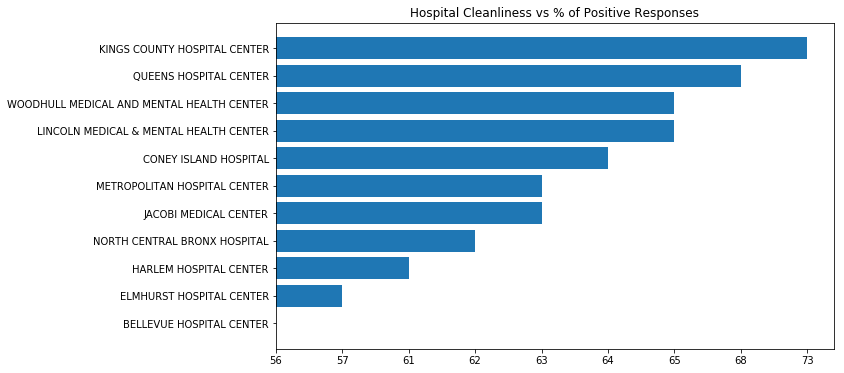

In [14]:
import operator
import collections
import matplotlib.pyplot as plt



sorted_room_clean_tup = sorted(room_clean.items(), key=operator.itemgetter(1))
sorted_room_clean_dict = collections.OrderedDict(sorted_room_clean_tup)

fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(sorted_room_clean_dict))
ax.barh(y_pos,list(sorted_room_clean_dict.values()),align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sorted_room_clean_dict.keys()))
ax.set_title("Hospital Cleanliness vs % of Positive Responses")
plt.show()

#### Inferences: 

"BELLEVUE HOSPITAL CENTER" is ranked the least while considering hospital rooms and bathrooms cleanliness whereas "KINGS COUNTY HOSPITAL CENTER" is ranked the highest.  
The difference in percentages between the highest ranked and the least ranked is 73-56 = 17%. This indicates 17% more people have ranked "KINGS COUNTY HOSPITAL CENTER" to be the best among 11 hospitals in terms of cleanliness. 

### 2. Bar Plot of Nurses Communication vs Percentage of Positive Responses: 

This bar plot would show the percentage of positive responses for each hospital in terms of nurses communication.

The survey question was: How often did nurses communicate well with patients?     
Answer/Positive Response was: Nurses "always" communicated well       
Percentage of Positive Responses indicate percentage of patients who took the survey and selected the Positive Response.


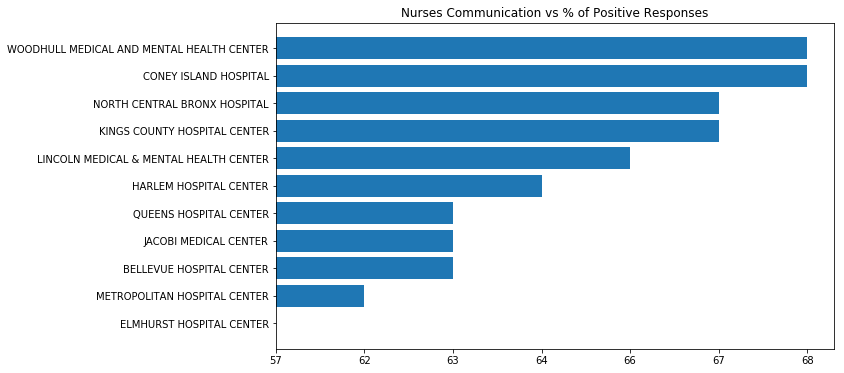

In [5]:
sorted_nur_com_tup = sorted(nur_com.items(), key=operator.itemgetter(1))
sorted_nur_com_dict = collections.OrderedDict(sorted_nur_com_tup)

fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(sorted_nur_com_dict))
ax.barh(y_pos,list(sorted_nur_com_dict.values()),align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sorted_nur_com_dict.keys()))
ax.set_title("Nurses Communication vs % of Positive Responses")
plt.show()

#### Inferences: 

"ELMHURST HOSPITAL CENTER" is ranked the least while considering nurses communication with patients whereas "WOODHULL MEDICAL AND MENTAL HEALTH CENTER" is ranked the highest.  
The difference in percentages between the highest ranked and the least ranked is 68-57 = 11%. This indicates 11% more people have ranked "WOODHULL MEDICAL AND MENTAL HEALTH CENTER" to be the best among 11 hospitals in terms of nurses communication. 

### 3. Bar Plot of Doctors Communication vs Percentage of Positive Responses: 

This bar plot would show the percentage of positive responses for each hospital in terms of doctors communication.

The survey question was: How often did doctors communicate well with patients?       
Answer/Positive Response was: Doctors "always" communicated well          
Percentage of Positive Responses indicate percentage of patients who took the survey and selected the Positive Response.


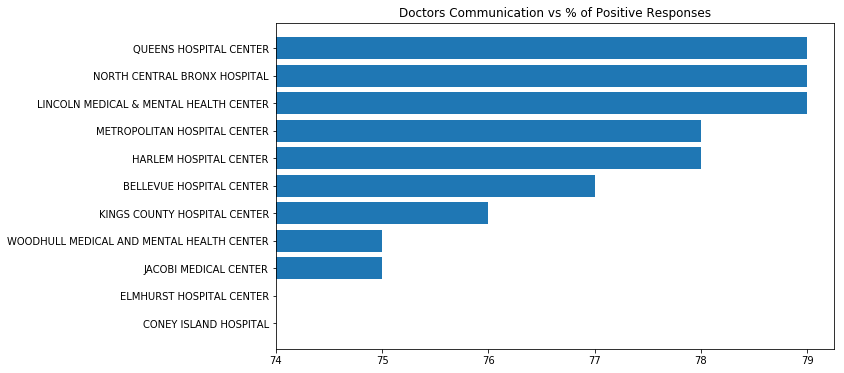

In [6]:
sorted_doc_com_tup = sorted(doc_com.items(), key=operator.itemgetter(1))
sorted_doc_com_dict = collections.OrderedDict(sorted_doc_com_tup)

fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(sorted_doc_com_dict))
ax.barh(y_pos,list(sorted_doc_com_dict.values()),align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sorted_doc_com_dict.keys()))
ax.set_title("Doctors Communication vs % of Positive Responses")
plt.show()

#### Inferences: 

"ELMHURST HOSPITAL CENTER" and "CONEY ISLAND HOSPITAL" are ranked the least while considering doctors communication whereas "LINCOLN MEDICAL & MENTAL HEALTH CENTER","NORTH CENTRAL BRONX HOSPITAL" and "QUEENS HOSPITAL CENTER" are ranked the highest.  
The difference in percentages between the highest ranked and the least ranked is 79-74 = 5%. This indicates only 5% more people have ranked "LINCOLN MEDICAL & MENTAL HEALTH CENTER","NORTH CENTRAL BRONX HOSPITAL" and "QUEENS HOSPITAL CENTER" to be the best among 11 hospitals in terms of doctors communication. 

### 4. Bar Plot of Quick Help from Hospital Staff vs Percentage of Positive Responses: 

This bar plot would show the percentage of positive responses for each hospital in terms of quick help from hospital staff.

The survey question was: How often did patients receive help quickly from hospital staff?       
Answer/Positive Response was: Patients "always" received help as soon as they wanted          
Percentage of Positive Responses indicate percentage of patients who took the survey and selected the Positive Response.


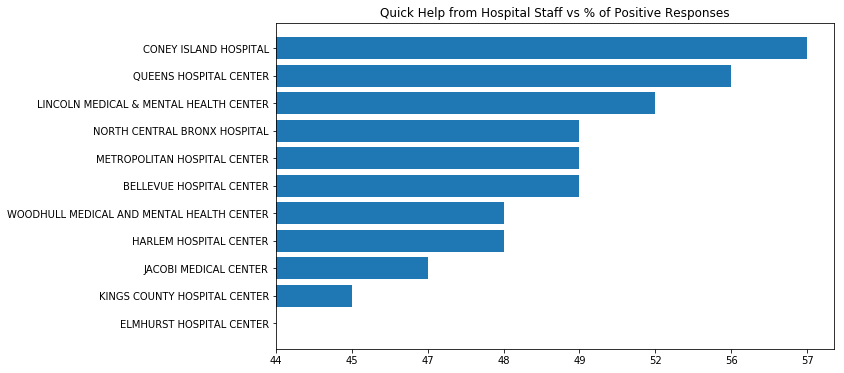

In [7]:
sorted_qck_hlp_tup = sorted(qck_hlp.items(), key=operator.itemgetter(1))
sorted_qck_hlp_dict = collections.OrderedDict(sorted_qck_hlp_tup)

fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(sorted_qck_hlp_dict))
ax.barh(y_pos,list(sorted_qck_hlp_dict.values()),align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sorted_qck_hlp_dict.keys()))
ax.set_title("Quick Help from Hospital Staff vs % of Positive Responses")
plt.show()

#### Inferences: 

"ELMHURST HOSPITAL CENTER" is ranked the least while considering quick help from hospital staff whereas "CONEY ISLAND HOSPITAL" is ranked the highest.  
The difference in percentages between the highest ranked and the least ranked is 57-44 = 7%. This indicates only 7% more people have ranked "CONEY ISLAND HOSPITAL" to be the best among 11 hospitals in terms of getting quick help from hospital staff. 

### 5. Bar Plot of Patients Pain Well-Controlled vs Percentage of Positive Responses: 

This bar plot would show the percentage of positive responses for each hospital in terms of controlling the patients pain.

The survey question was: How often was patients pain well controlled?        
Answer/Positive Response was: Pain was "always" well controlled             
Percentage of Positive Responses indicate percentage of patients who took the survey and selected the Positive Response.


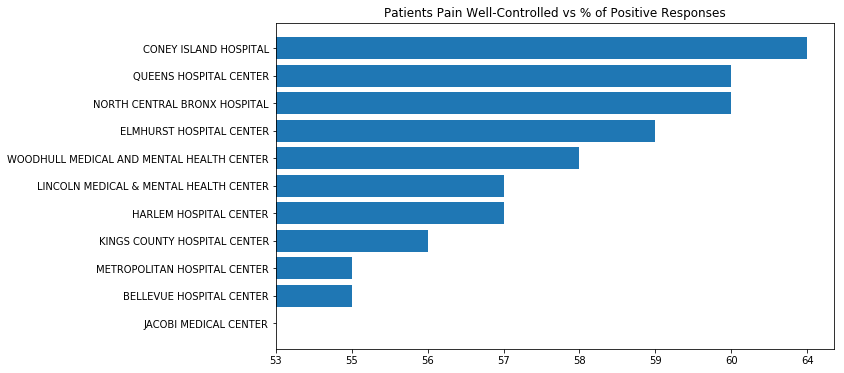

In [8]:
sorted_pain_ctrl_tup = sorted(pain_ctrl.items(), key=operator.itemgetter(1))
sorted_pain_ctrl_dict = collections.OrderedDict(sorted_pain_ctrl_tup)

fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(sorted_pain_ctrl_dict))
ax.barh(y_pos,list(sorted_pain_ctrl_dict.values()),align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sorted_pain_ctrl_dict.keys()))
ax.set_title("Patients Pain Well-Controlled vs % of Positive Responses")
plt.show()

#### Inferences: 

"JACOBI MEDICAL CENTER" is ranked the least while considering patients pain well-controlled whereas "CONEY ISLAND HOSPITAL" is ranked the highest.  
The difference in percentages between the highest ranked and the least ranked is 64-53 = 11%. This indicates 11% more people have ranked "CONEY ISLAND HOSPITAL" to be the best among 11 hospitals in terms of patients pain well-controlled. 

### 6. Bar Plot of Staff Explain About Medicines Before Giving vs Percentage of Positive Responses: 

This bar plot would show the percentage of positive responses for each hospital in terms of hospital staff explaining about the medicines before giving them.

The survey question was: How often did staff explain about medicines before giving them to patients?          
Answer/Positive Response was: Staff "always" explained             
Percentage of Positive Responses indicate percentage of patients who took the survey and selected the Positive Response.


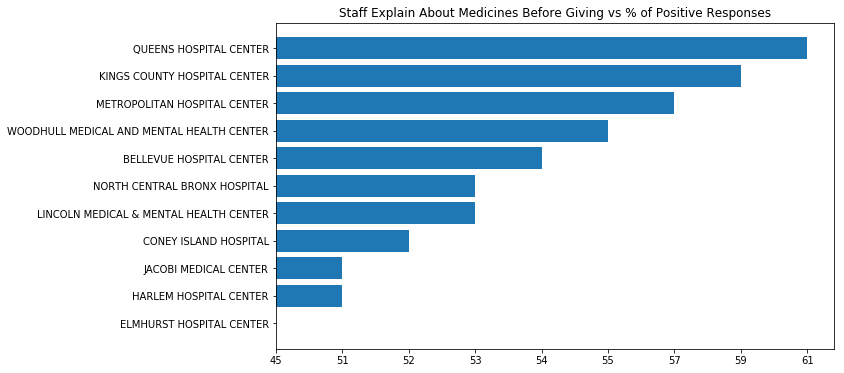

In [9]:
sorted_med_exp_tup = sorted(med_exp.items(), key=operator.itemgetter(1))
sorted_med_exp_dict = collections.OrderedDict(sorted_med_exp_tup)

fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(sorted_med_exp_dict))
ax.barh(y_pos,list(sorted_med_exp_dict.values()),align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sorted_med_exp_dict.keys()))
ax.set_title("Staff Explain About Medicines Before Giving vs % of Positive Responses")
plt.show()

#### Inferences: 

"ELMHURST HOSPITAL CENTER" is ranked the least while considering the hospital staff explaining about medicines before they are given to the patients whereas "QUEENS HOSPITAL CENTER" is ranked the highest.  
The difference in percentages between the highest ranked and the least ranked is 61-45 = 16%. This indicates 16% more people have ranked "QUEENS HOSPITAL CENTER" to be the best among 11 hospitals in terms of the hospital staff explaining about medicines before they are given to the patients. 

### 7. Bar Plot of Info About Recovery At Home vs Percentage of Positive Responses: 

This bar plot would show the percentage of positive responses for each hospital in terms of providing info to patients about their recovery at home.

The survey question was: Were patients given information about what to do during their recovery at home?             
Answer/Positive Response was: Yes, staff "did" give patients this information               
Percentage of Positive Responses indicate percentage of patients who took the survey and selected the Positive Response.


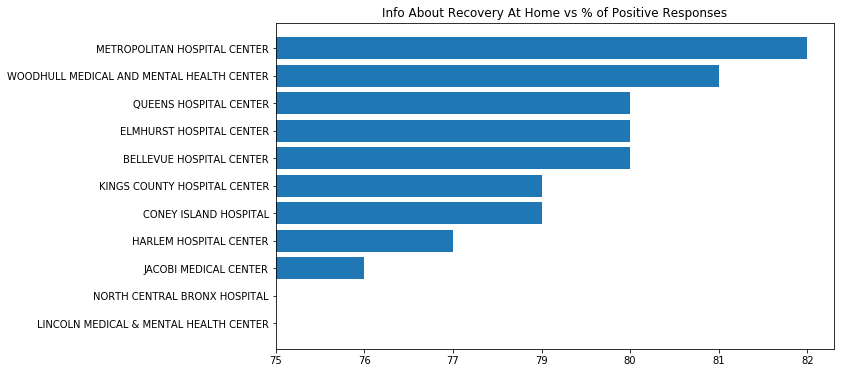

In [10]:
sorted_rcvry_info_tup = sorted(rcvry_info.items(), key=operator.itemgetter(1))
sorted_rcvry_info_dict = collections.OrderedDict(sorted_rcvry_info_tup)

fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(sorted_rcvry_info_dict))
ax.barh(y_pos,list(sorted_rcvry_info_dict.values()),align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sorted_rcvry_info_dict.keys()))
ax.set_title("Info About Recovery At Home vs % of Positive Responses")
plt.show()

#### Inferences: 

"LINCOLN MEDICAL & MENTAL HEALTH CENTER" and "NORTH CENTRAL BRONX HOSPITAL" are ranked the least while considering the hospital staff explaining about medicines before they are given to the patients whereas "METROPOLITAN HOSPITAL CENTER" is ranked the highest.  
The difference in percentages between the highest ranked and the least ranked is 82-75 = 7%. This indicates only 7% more people have ranked "METROPOLITAN HOSPITAL CENTER" to be the best among 11 hospitals in terms of the hospital staff explaining about medicines before they are given to the patients. 

### 8. Bar Plot of Hospital Overall Rating vs Percentage of Positive Responses: 

This bar plot would show the percentage of positive responses for each hospital in terms of overall rating.

The survey question was: How do patients rate the hospital overall?               
Answer/Positive Response was: Patients who gave a rating of "9" or "10" (high)                 
Percentage of Positive Responses indicate percentage of patients who took the survey and selected the Positive Response.


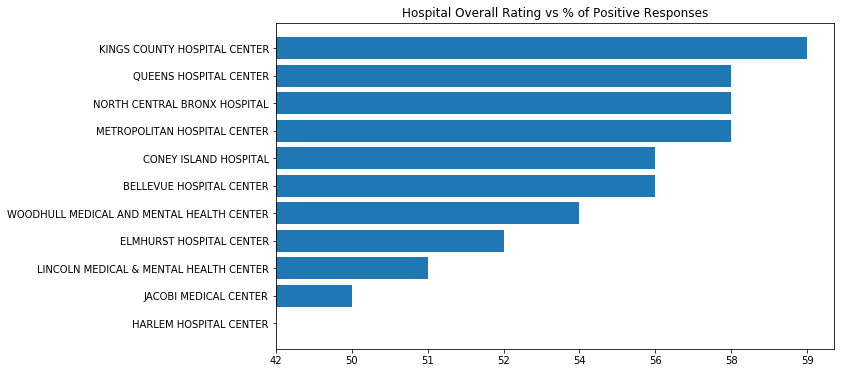

In [11]:
sorted_ovrall_rat_tup = sorted(ovrall_rat.items(), key=operator.itemgetter(1))
sorted_ovrall_rat_dict = collections.OrderedDict(sorted_ovrall_rat_tup)

fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(sorted_ovrall_rat_dict))
ax.barh(y_pos,list(sorted_ovrall_rat_dict.values()),align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sorted_ovrall_rat_dict.keys()))
ax.set_title("Hospital Overall Rating vs % of Positive Responses")
plt.show()

#### Inferences: 

"HARLEM HOSPITAL CENTER" is ranked the least while considering the hospital's overall rating whereas "KINGS COUNTY HOSPITAL CENTER" is ranked the highest.  
The difference in percentages between the highest ranked and the least ranked is 59-42 = 17%. This indicates 17% more people have ranked "KINGS COUNTY HOSPITAL CENTER" to be the best among 11 hospitals in terms of the hospital's overall rating. 

### 9. Bar Plot of Quiet Ambience At Night vs Percentage of Positive Responses: 

This bar plot would show the percentage of positive responses for each hospital in terms of quiet ambience at night.

The survey question was: How often was the area around patients rooms kept quiet at night?                 
Answer/Positive Response was: Always quiet at night                     
Percentage of Positive Responses indicate percentage of patients who took the survey and selected the Positive Response.


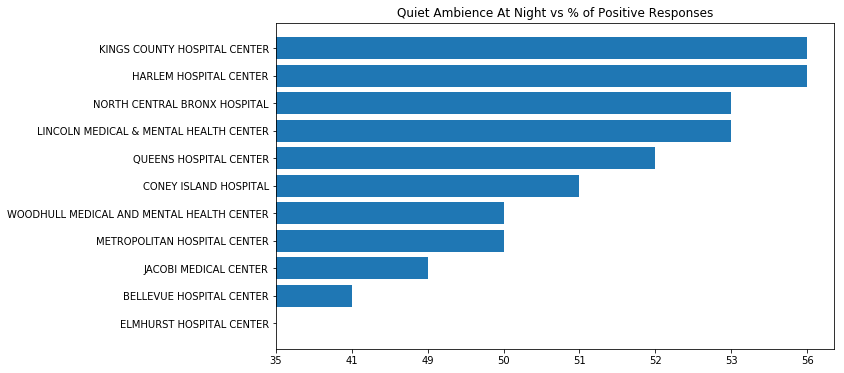

In [12]:
sorted_nght_qut_tup = sorted(nght_qut.items(), key=operator.itemgetter(1))
sorted_nght_qut_dict = collections.OrderedDict(sorted_nght_qut_tup)

fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(sorted_nght_qut_dict))
ax.barh(y_pos,list(sorted_nght_qut_dict.values()),align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sorted_nght_qut_dict.keys()))
ax.set_title("Quiet Ambience At Night vs % of Positive Responses")
plt.show()

#### Inferences: 

"ELMHURST HOSPITAL CENTER" is ranked the least while considering the area around patients rooms kept quiet at night whereas "HARLEM HOSPITAL CENTER" and "KINGS COUNTY HOSPITAL CENTER" are ranked the highest.   
The difference in percentages between the highest ranked and the least ranked is 56-35 = 21%. This indicates 21% more people have ranked "KINGS COUNTY HOSPITAL CENTER" and "HARLEM HOSPITAL CENTER" to be the best among 11 hospitals in terms of the area around patients rooms kept quiet at night.

### 10. Bar Plot of Hospital Recommended vs Percentage of Positive Responses: 

This bar plot would show the percentage of positive responses for each hospital in terms of recommending to the hospital to friends or family.

The survey question was: Would patients recommend the hospital to friends and family?                    
Answer/Positive Response was: "YES", patients would definitely recommend the hospital                        
Percentage of Positive Responses indicate percentage of patients who took the survey and selected the Positive Response.


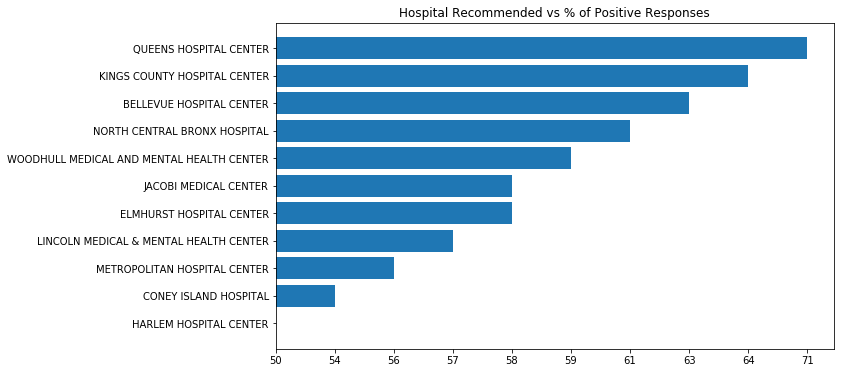

In [13]:
sorted_hosp_recom_tup = sorted(hosp_recom.items(), key=operator.itemgetter(1))
sorted_hosp_recom_dict = collections.OrderedDict(sorted_hosp_recom_tup)

fig, ax = plt.subplots(figsize=(10,6))
y_pos = np.arange(len(sorted_hosp_recom_dict))
ax.barh(y_pos,list(sorted_hosp_recom_dict.values()),align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(sorted_hosp_recom_dict.keys()))
ax.set_title("Hospital Recommended vs % of Positive Responses")
plt.show()

#### Inferences: 

"HARLEM HOSPITAL CENTER" is ranked the least while considering the recommendation of the hospital to family or friends whereas "QUEENS HOSPITAL CENTER" is ranked the highest.  
The difference in percentages between the highest ranked and the least ranked is 71-50 = 21%. This indicates 21% more people have ranked "QUEENS HOSPITAL CENTER" to be the best among 11 hospitals in terms of recommendation of the hospital to family or friends.

## Recommendations:

1. "ELMHURST HOSPITAL CENTER" is ranked the least for many feedback questions.  
2. "KINGS COUNTY HOSPITAL CENTER" and "QUEENS HOSPITAL CENTER" are ranked the highest for many feedback questions.  
3. The overall rating is highest for "KINGS COUNTY HOSPITAL CENTER". It is also ranked high for patients room and bathrooms cleanliness and maintaining the patient's room to be quiet at night.  
4. The overall rating is the least for "HARLEM HOSPITAL CENTER".  It is also is recommended less by the patients for friends and family. 
5. "QUEENS HOSPITAL CENTER" is recommended more by the patients for friends and family. It also stands to be the best while explaining about the medicines that they are giving to the patients and doctors communication.  
6. "CONEY ISLAND HOSPITAL" is ranked the highest if at all quick help is required by the patients from hospital staff. However most of the hospitals among 11 seem to offer quick help to patients when required. The margin is just 7% between the top rated and the least rated hospitals.  
7. "CONEY ISLAND HOSPITAL" is ranked highest in terms of nurses communicating well and controlling patients pain well.  
8. Doctors communication is almost consistent among all the 11 hospitals in New York with a minute difference of 5% in ratings between the highest ranked and lowest ranked hospitals.  
9. If at all patients are looking for the best hospital, "KINGS COUNTY HOSPITAL CENTER","CONEY ISLAND HOSPITAL" and "QUEENS HOSPITAL CENTER" could be better options out of the 11 hospitals in New York city since they are ranked to the best in 3 out of 10 services proovided.  
10. However, since the overall rating is high for "KINGS COUNTY HOSPITAL CENTER" it can be the best of 11 hospitals in New York city.
11. "ELMHURST HOSPITAL CENTER" and "HARLEM HOSPITAL CENTER" are lagging a lot when compared to other hospitals in many areas. Both of these hospitals probably need an action plan about improvising their services by evaluating and restructuring the lagging areas.